# Demo

Demonstrate `httm` image transformations.

## Getting Started

### Importing `matplotlib`

To start, we will import `matplotlib` and increase the figure size so we can reasonably see artifacts in various FITS images we are going to be looking at.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)

### Bringing in a FITS File

Assume you have a file: 
    
    fits_data/calibrated_fits/spot50.fits

...containing an idealized FITS image, output from optical simulation.

First, let's just look at it.

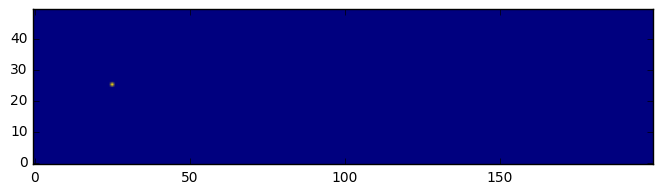

In [4]:
from astropy.io import fits as pyfits
import numpy
spot50=pyfits.open('fits_data/calibrated_fits/spot50.fits')
matplotlib.pyplot.imshow(numpy.log10(spot50[0].data),clim=(2,8))
matplotlib.pyplot.gca().invert_yaxis()

Here, we've got a 50 x 200 image. HTTM will assume this is four slices of 50 x 50 by default. We have 1000000 electrons in one pixel in the center of slice 0.

To get started in HTTM, open this file and extract a `httm.data_structures.calibrated_converter.SingleCCDCalibratedConverter` object.

This is done by calling `httm.fits_utilities.calibrated_fits.calibrated_converter_from_fits`.

In [5]:
from httm.fits_utilities.calibrated_fits import calibrated_converter_from_fits

ideal_data = calibrated_converter_from_fits('fits_data/calibrated_fits/spot50.fits')

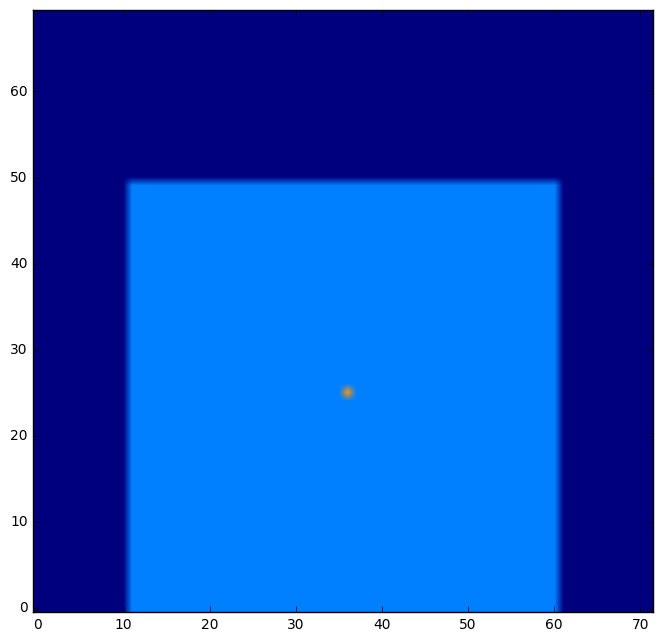

In [6]:
matplotlib.pyplot.imshow(numpy.log10(ideal_data.slices[0].pixels+1), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [7]:
from httm.transformations.calibrated_converters_to_raw import introduce_smear_rows

In [8]:
smeared=introduce_smear_rows(ideal_data)

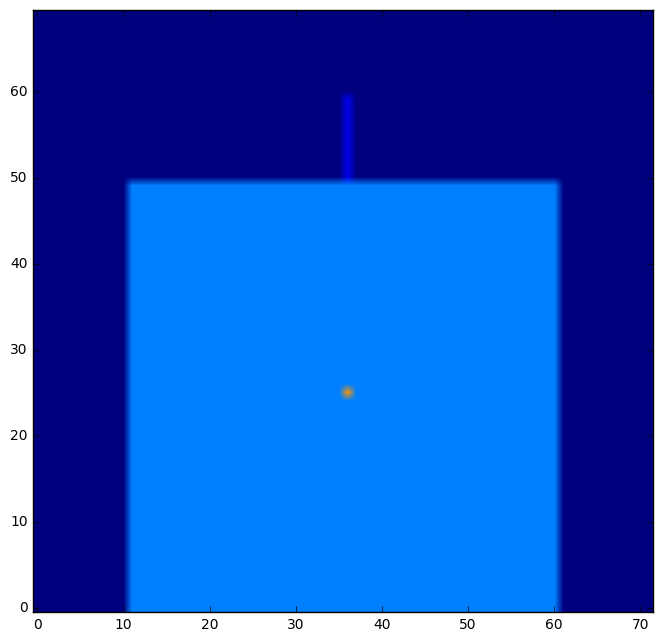

In [9]:
matplotlib.pyplot.imshow(numpy.log10(smeared.slices[0].pixels+1), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [10]:
from httm.transformations.calibrated_converters_to_raw import add_shot_noise

In [11]:
shot = add_shot_noise(smeared)

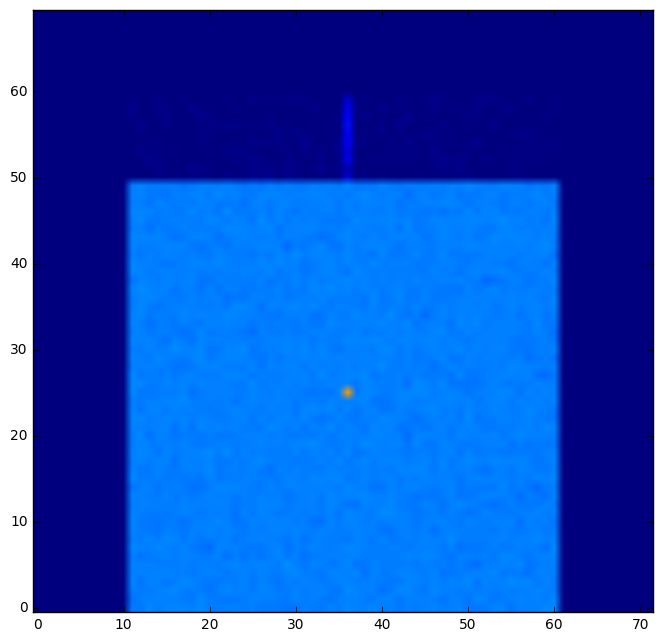

In [12]:
matplotlib.pyplot.imshow(numpy.log10(shot.slices[0].pixels+1), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [13]:
from httm.transformations.calibrated_converters_to_raw import simulate_blooming

In [14]:
bloomed = simulate_blooming(shot)

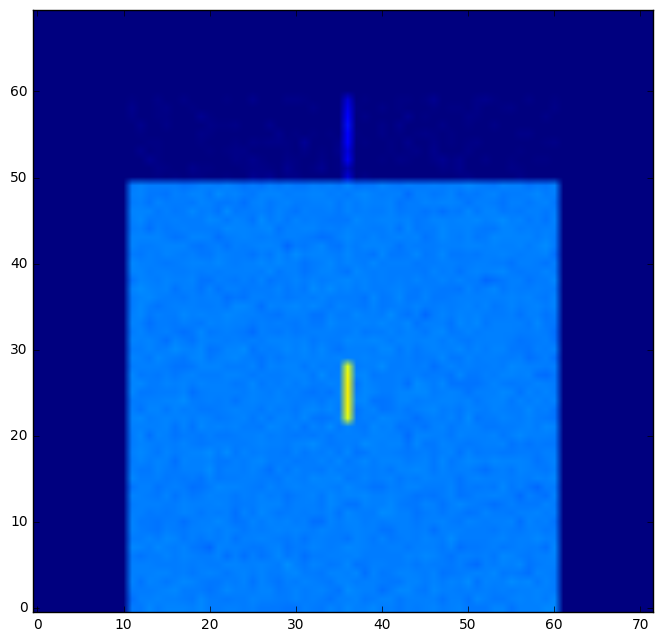

In [15]:
matplotlib.pyplot.imshow(numpy.log10(bloomed.slices[0].pixels+1), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [16]:
from httm.transformations.calibrated_converters_to_raw import add_readout_noise

In [17]:
noisy = add_readout_noise(bloomed)

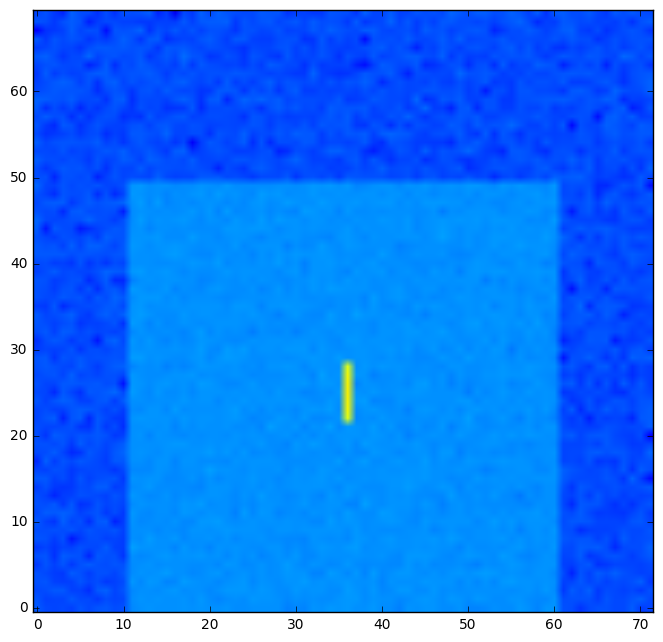

In [18]:
matplotlib.pyplot.imshow(numpy.log10(noisy.slices[0].pixels+40), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [19]:
from httm.transformations.calibrated_converters_to_raw import simulate_undershoot

In [20]:
undershot=simulate_undershoot(noisy)

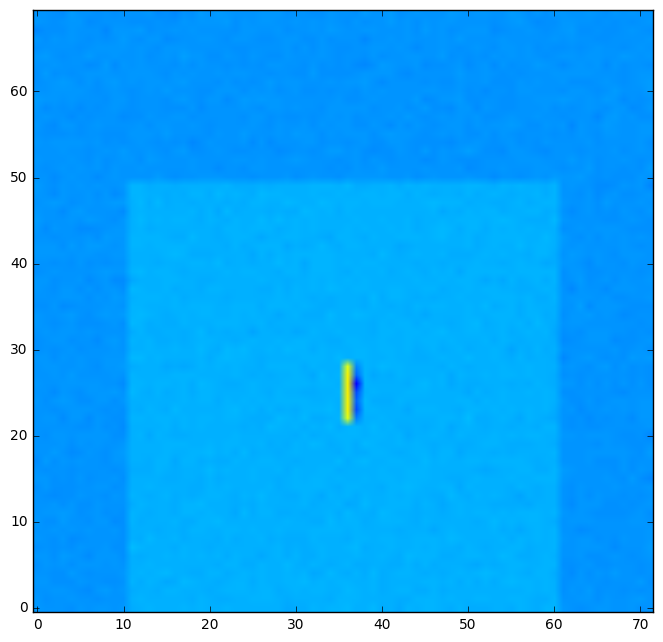

In [21]:
matplotlib.pyplot.imshow(numpy.log10(undershot.slices[0].pixels+150), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [25]:
from httm.transformations.calibrated_converters_to_raw import add_baseline

In [26]:
baselined = add_baseline(undershot)

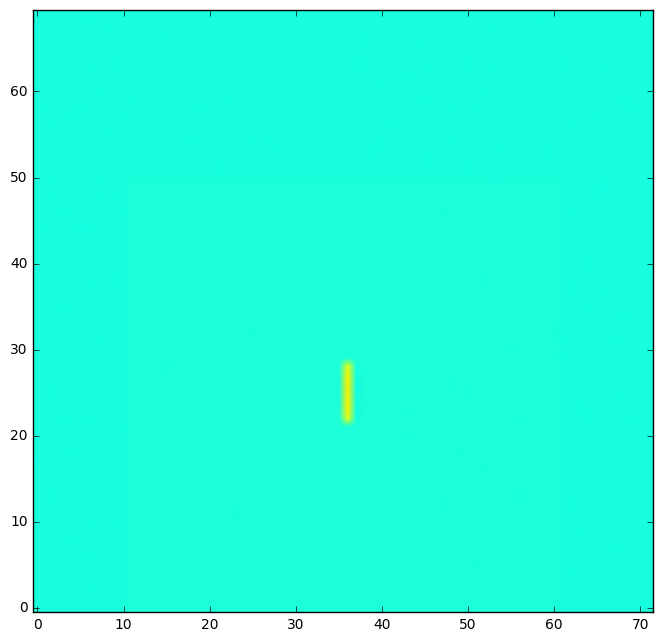

In [27]:
matplotlib.pyplot.imshow(numpy.log10(baselined.slices[0].pixels), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [28]:
from httm.transformations.calibrated_converters_to_raw import convert_electrons_to_adu

In [29]:
raw = convert_electrons_to_adu(baselined)

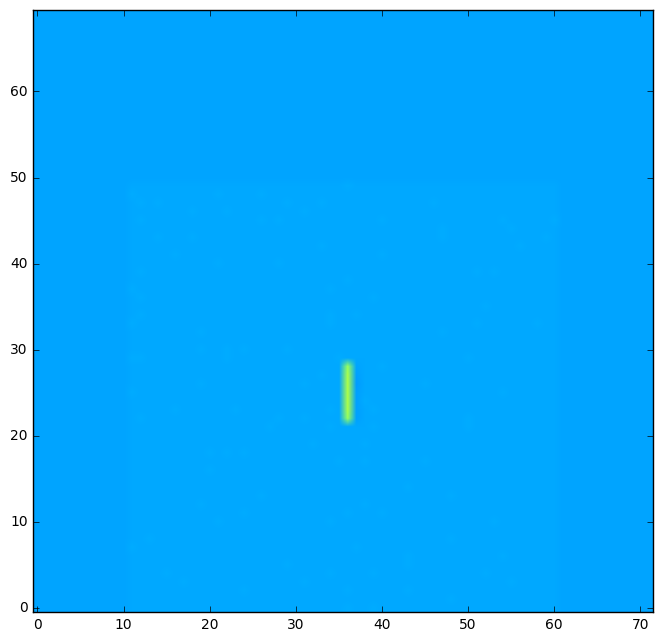

In [30]:
matplotlib.pyplot.imshow(numpy.log10(raw.slices[0].pixels), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()